## <font color=blue|yellow>Name / Ahmed Alshehri</font>
## <font color=blue|yellow>PROJECT Number / 2</font>
## <font color=blue|yellow>Topic/ Investigate a Dataset</font>


In [1]:
### Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline
from datetime import datetime

from datetime import datetime

In [2]:
### Load the data

dr = pd.read_csv('noshowup.csv')
dr.head(2)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No

## <font color=green>Asking Questions</font>


#### <font color=green|red> The PDF show this part in details </font>
#### <font color=green|blue|red> a) is there any correlation between age and patients attending? </font>
#### <font color=green|blue|red> b) Are most patients showing up for their appointment or not? </font>
#### <font color=green|blue|red> c) Is there any relation between the age and the gender of the patients attending ? </font>
#### <font color=green|blue|red> d)Are most patients receiving SMS for their appointment or not? </font>
#### <font color=green|blue|red> e) Is there any relation between Number of patients and the appointment time after registered ?</font>
#### <font color=green|blue|red> f) Is there any correlation between the Neighbourhood and the number of patients? </font>






 

-----
-----



## <font color=blue>Data Wrangling and EDA</font>
### <font color=blue>This part  is about (Gathering , assessing, cleaning ) </font>


---

#### <font color=blue|red|green|pink>Problems with the Data Set:</font>

#### <font color=blue|green>1) I replace the value in “No-show” column to be  True or  No for analysis purpose.</font>
#### <font color=blue|green>2) The ID patient was Display numbers in scientific (exponential) notation so I change the format because it was Display numbers in scientific (exponential) notation even it will not effect the analysis because it was just for display purpose.</font>
#### <font color=blue|green>3) For time series analysis I Convert each column of data  to a suitable datatype and standard time format  , in the “ScheduledDay” column we  have the time in seconds but in the “AppointmentDay” column we have only in days so I make both of them in days.</font>
#### <font color=blue|green>4) I found some coloumns names are not clear so I rename  some columns to be more attractive and clear </font>



---

In [3]:
list(dr.columns.values)


['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

---

<font color=green|yellow>Here, all columns which were clouding up visual space and were not going to be used were removed.
</font>

In [4]:
dr.drop(['Scholarship','Handcap'],axis=1,inplace=True)


---

<font color=green|yellow>I change the format because it was Display numbers in scientific (exponential) notation, such as Patient_Id columns.
</font>

In [5]:
pd.set_option('float_format', '{}'.format)

dr.head(10)

PatientId  AppointmentID Gender          ScheduledDay  \
0  29872499824296.0        5642903      F  2016-04-29T18:38:08Z   
1 558997776694438.0        5642503      M  2016-04-29T16:08:27Z   
2   4262962299951.0        5642549      F  2016-04-29T16:19:04Z   
3    867951213174.0        5642828      F  2016-04-29T17:29:31Z   
4   8841186448183.0        5642494      F  2016-04-29T16:07:23Z   
5  95985133231274.0        5626772      F  2016-04-27T08:36:51Z   
6 733688164476661.0        5630279      F  2016-04-27T15:05:12Z   
7   3449833394123.0        5630575      F  2016-04-27T15:39:58Z   
8  56394729949972.0        5638447      F  2016-04-29T08:02:16Z   
9  78124564369297.0        5629123      F  2016-04-27T12:48:25Z   

         AppointmentDay  Age      Neighbourhood  Hipertension  Diabetes  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA             1         0   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA             0         0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA             0         0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI             0         0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA             1         1   
5  2016-04-29T00:00:00Z   76          REPÚBLICA             1         0   
6  2016-04-29T00:00:00Z   23         GOIABEIRAS             0         0   
7  2016-04-29T00:00:00Z   39         GOIABEIRAS             0         0   
8  2016-04-29T00:00:00Z   21         ANDORINHAS             0         0   
9  2016-04-29T00:00:00Z   19          CONQUISTA             0         0   

   Alcoholism  SMS_received No-show  
0           0             0      No  
1           0             0      No  
2           0             0      No  
3           0             0      No  
4           0             0      No  
5           0             0      No  
6           0             0     Yes  
7           0             0     Yes  
8           0             0      No  
9           0             0      No

In [6]:
dr.shape

(110527, 12)

---


<font color=blue>To check which columns have missing values 
</font>

In [7]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 10.1+ MB


---

<font color=blue>This returns the datatypes of the columns</font>

In [8]:
dr.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Hipertension        int64
Diabetes            int64
Alcoholism          int64
SMS_received        int64
No-show            object
dtype: object

---


<font color=blue>To check for duplicates in the data</font>

In [9]:
sum(dr.duplicated())

0

 ---
 
 <font color=red|green>No duplicate rows  so no rows will need to  drop</font>


In [10]:
dr.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Hipertension           2
Diabetes               2
Alcoholism             2
SMS_received           2
No-show                2
dtype: int64

---


<font color=blue|green>The following returns useful descriptive statistics for each column of data
</font>


In [11]:
dr.describe()

PatientId     AppointmentID                Age  \
count           110527.0          110527.0           110527.0   
mean  147496265710392.38 5675305.123426855  37.08887421173107   
std   256094920291738.88 71295.75153966916 23.110204963681948   
min          39217.84439         5030230.0               -1.0   
25%      4172614444192.0         5640285.5               18.0   
50%     31731838713978.0         5680573.0               37.0   
75%     94391720898175.0         5725523.5               55.0   
max    999981631772427.0         5790484.0              115.0   

             Hipertension            Diabetes           Alcoholism  \
count            110527.0            110527.0             110527.0   
mean   0.1972459218109602 0.07186479321794674 0.030399811810688793   
std   0.39792134994753325  0.2582650735076741  0.17168555541436223   
min                   0.0                 0.0                  0.0   
25%                   0.0                 0.0                  0.0   
50%                   0.0                 0.0                  0.0   
75%                   0.0                 0.0                  0.0   
max                   1.0                 1.0                  1.0   

             SMS_received  
count            110527.0  
mean  0.32102563174608917  
std   0.46687273170178245  
min                   0.0  
25%                   0.0  
50%                   0.0  
75%                   1.0  
max                   1.0

---




#### Time series analysis



<font color=blue-green>I Converted each column of data  to a suitable datatype
In the ScheduledDay we  have the time in seconds but in the AppointmentDay we have only in days so I make both of them in days only</font>

In [12]:

dr['ScheduledDay']=pd.to_datetime(dr['ScheduledDay']).dt.date
dr['AppointmentDay']=pd.to_datetime(dr['AppointmentDay']).dt.date
dr.head()

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  29872499824296.0        5642903      F   2016-04-29     2016-04-29   62   
1 558997776694438.0        5642503      M   2016-04-29     2016-04-29   56   
2   4262962299951.0        5642549      F   2016-04-29     2016-04-29   62   
3    867951213174.0        5642828      F   2016-04-29     2016-04-29    8   
4   8841186448183.0        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Hipertension  Diabetes  Alcoholism  SMS_received No-show  
0    JARDIM DA PENHA             1         0           0             0      No  
1    JARDIM DA PENHA             0         0           0             0      No  
2      MATA DA PRAIA             0         0           0             0      No  
3  PONTAL DE CAMBURI             0         0           0             0      No  
4    JARDIM DA PENHA             1         1           0             0      No

---


<font color=red>I changed the data types to integer so I can analysis and compare two coloumns with same specific types
</font>


In [13]:
dr['No-show'] = dr['No-show'].map({'Yes': True, 'No': False})

dr.head(5)

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  29872499824296.0        5642903      F   2016-04-29     2016-04-29   62   
1 558997776694438.0        5642503      M   2016-04-29     2016-04-29   56   
2   4262962299951.0        5642549      F   2016-04-29     2016-04-29   62   
3    867951213174.0        5642828      F   2016-04-29     2016-04-29    8   
4   8841186448183.0        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Hipertension  Diabetes  Alcoholism  SMS_received  \
0    JARDIM DA PENHA             1         0           0             0   
1    JARDIM DA PENHA             0         0           0             0   
2      MATA DA PRAIA             0         0           0             0   
3  PONTAL DE CAMBURI             0         0           0             0   
4    JARDIM DA PENHA             1         1           0             0   

   No-show  
0    False  
1    False  
2    False  
3    False  
4    False

---


#### I found some coloumns names are not clear so I rename  some columns to be more attractive and clear 
##### <font color=pink>AppointmentID to Appointment_ID</font>
##### <font color=green>PatientId to Patient Id</font>
##### <font color=blue>ScheduledDay to Scheduled_Day</font>
##### <font color=yellow>AppointmentDay to Appointment_Day</font>
#####  <font color=red>No-show to Attendance</font>


In [14]:


dr.rename(columns={'AppointmentID':'Appointment_ID',
                          'PatientId':'Patient_Id','ScheduledDay':"Scheduled_Day" , "AppointmentDay":"Appointment_Day" , "No-show":"Attendance" }, inplace=True)
dr.head()

Patient_Id  Appointment_ID Gender Scheduled_Day Appointment_Day  Age  \
0  29872499824296.0         5642903      F    2016-04-29      2016-04-29   62   
1 558997776694438.0         5642503      M    2016-04-29      2016-04-29   56   
2   4262962299951.0         5642549      F    2016-04-29      2016-04-29   62   
3    867951213174.0         5642828      F    2016-04-29      2016-04-29    8   
4   8841186448183.0         5642494      F    2016-04-29      2016-04-29   56   

       Neighbourhood  Hipertension  Diabetes  Alcoholism  SMS_received  \
0    JARDIM DA PENHA             1         0           0             0   
1    JARDIM DA PENHA             0         0           0             0   
2      MATA DA PRAIA             0         0           0             0   
3  PONTAL DE CAMBURI             0         0           0             0   
4    JARDIM DA PENHA             1         1           0             0   

   Attendance  
0       False  
1       False  
2       False  
3       False  
4       False

***

## Exploratory Data Analysis
---

### <font color=blue|red|green>Question / Is there any correlation between Age and patients attending ?</font>

In [15]:
not_attend = dr.Attendance == False
attend = dr.Attendance == True

def attendance_mean ():
 return dr.Age[attend].mean()

In [16]:
def no_attendance_mean ():
 return dr.Age[not_attend].mean()

In [17]:
attendance_mean ()

34.31766656212196

In [18]:
no_attendance_mean ()

37.790064393252315

#### <font color=blue|red|green|pink>Conclusion</font>
##### <font color=red|green|pink|yellow>It is showing that the average of people's age attendance to their appointment  is 34.317 years old and the average of people's age not attendance to their appointment  is 37.7 years  , so it doesn't look to me meaningful </font>


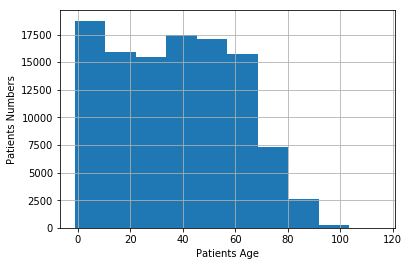

In [48]:
plt.xlabel('Patients Age')
plt.ylabel('Patients Numbers');
dr.Age.hist();

---

### <font color=blue|red|green>Question / Are people repeating coming to appointments? </font>

In [49]:
def count_Id ():
    return dr.Patient_Id.value_counts()

In [50]:
count_Id ()

822145925426128.0    88
99637671331.0        84
26886125921145.0     70
33534783483176.0     65
258424392677.0       62
75797461494159.0     62
871374938638855.0    62
6264198675331.0      62
66844879846766.0     57
872278549442.0       55
89239687393655.0     54
8435223536.0         51
853439686798559.0    50
14479974122994.0     46
65433599726992.0     46
81894521843749.0     42
9452745294842.0      42
188232341789524.0    40
9496196639835.0      38
2271579924275.0      38
13364929297498.0     37
1484143378533.0      35
88834999836575.0     34
986162815579582.0    34
712458866975343.0    33
416755661551767.0    30
6128878448536.0      30
81213966782532.0     29
8634164126317.0      24
36994987339512.0     23
                     ..
6375629133741.0       1
9369127452866.0       1
537555552769726.0     1
166218389293.0        1
72346149751323.0      1
9649989773813.0       1
69127827378.0         1
19542647266766.0      1
27363771232.0         1
553269373865.0        1
7149583186443.0 

In [51]:
count_Id= dr['Patient_Id'].value_counts()
mean_Id= round(count_Id.mean(),2)

mean_Id

1.77

#### <font color=blue|red|green|pink>Conclusion</font>
##### <font color=red|green|pink|yellow>It is showing that the average of people repeat coming to the hospital is 1.77 per patients </font>


***

## <font color=blue|red>Question / Is there any correlation between gender and patient attending? </font>

In [52]:
m_f= dr['Gender'].value_counts()

m_f

F    71840
M    38687
Name: Gender, dtype: int64

In [53]:
X = m_f[0]
Y = m_f[1]
Z = 100/(int(X)+int(Y))
print('Number of Female: '+ str(X) + " persons")
print('Number of male: '+ str(Y) + " persons")
print('Percent of Female: '+str(X*Z)+'%')
print('Percent of male: '+str(Y*Z)+'%')
print('Percent of difference: '+str((X*Z)-(Y*Z))+'%')


Number of Female: 71840 persons
Number of male: 38687 persons
Percent of Female: 64.99769287142509%
Percent of male: 35.00230712857492%
Percent of difference: 29.995385742850168%


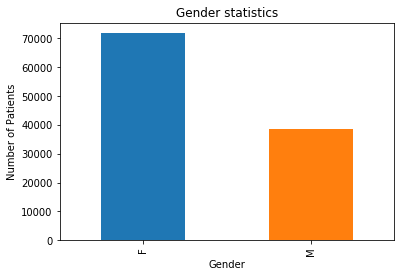

In [54]:
m_f.plot(kind="bar", title="Gender statistics");
plt.ylabel("Number of Patients");
plt.xlabel("Gender");

#### <font color=blue|red|green|pink|yellow>Conclusion</font>
### <font color=blue|red>It is showing that the Female is more than male for attending their medical appointment in general  , which is about 30% difference</font>



---
---

### <font color=blue|red|green>Question / what is the percent of people having Hipertension or Diabetes ? </font>

In [55]:
m_h= dr['Hipertension'].value_counts()
m_d= dr['Diabetes'].value_counts()
m_q= dr['Alcoholism'].value_counts()

Q = m_h[0]
W = m_h[1]
E = 100/(int(Q)+int(W))

R = m_d[0]
T = m_d[1]
U = 100/(int(R)+int(T))

I = m_q[0]
O = m_q[1]
P = 100/(int(I)+int(O))

print('Number of people NOT having Hipertension: '+str(Q)+" persons")
print('Number of people having Hipertension: '+str(W)+" persons")
print('Percent of not having Hipertension: '+str(Q*E)+'%')
print('Percent of people having Hipertension: '+str(W*E)+'%')
#---
print('Number of people not having Diabetes: '+str(R)+" persons")
print('Number of people having Diabetes: '+str(T)+" persons")
print('Percent of not having Diabetes: '+str(R*U)+'%')
print('Percent of people having Diabetes: '+str(T*U)+'%')
#---
print('Number of people not having Alcoholism: '+str(I)+" persons")
print('Number of people having Alcoholism: '+str(O)+" persons")
print('Percent of not having Alcoholism: '+str(I*P)+'%')
print('Percent of people having Alcoholism: '+str(P*O)+'%')



Number of people NOT having Hipertension: 88726 persons
Number of people having Hipertension: 21801 persons
Percent of not having Hipertension: 80.27540781890399%
Percent of people having Hipertension: 19.72459218109602%
Number of people not having Diabetes: 102584 persons
Number of people having Diabetes: 7943 persons
Percent of not having Diabetes: 92.81352067820532%
Percent of people having Diabetes: 7.186479321794675%
Number of people not having Alcoholism: 107167 persons
Number of people having Alcoholism: 3360 persons
Percent of not having Alcoholism: 96.96001881893112%
Percent of people having Alcoholism: 3.039981181068879%


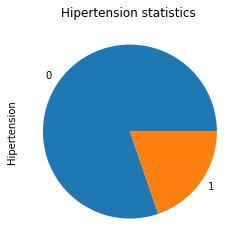

In [56]:
m_h.plot(kind="pie", title="Hipertension statistics ");


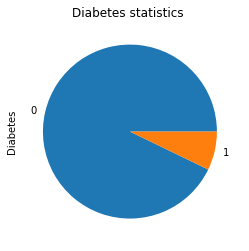

In [57]:
m_d.plot(kind="pie", title="Diabetes statistics ");


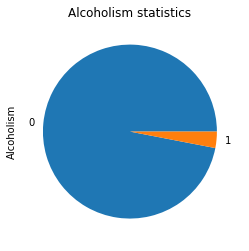

In [58]:
m_q.plot(kind="pie", title="Alcoholism statistics");


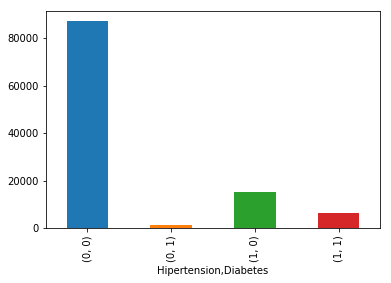

In [59]:
dr.groupby("Hipertension")['Diabetes'].value_counts().plot(kind='bar')

#m_e.plot(kind="bar", title="Attending statistics ");
#plt.ylabel("Number of Patients");
#plt.xlabel("Attendance");

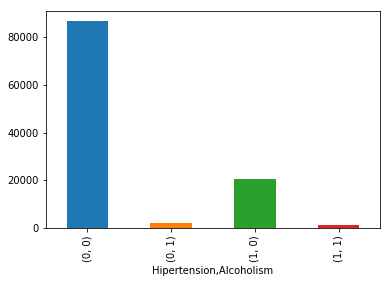

In [60]:
dr.groupby("Hipertension")['Alcoholism'].value_counts().plot(kind='bar')



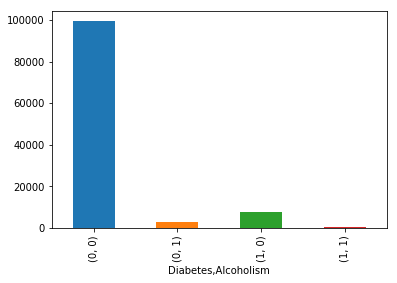

In [61]:
dr.groupby('Diabetes')['Alcoholism'].value_counts().plot(kind='bar')


### <font color=blue|red|green|pink|yellow>Conclusion</font>
#### <font color=blue>Number of people NOT having Hipertension: 88726 persons</font>
#### <font color=blue>Number of people having Hipertension: 21801 persons</font>
#### <font color=blue>Percent of not having Hipertension: 80.27%</font>
#### <font color=blue>Percent of people having Hipertension: 19.72%</font>
#### <font color=blue>Number of people not having Diabetes: 102584 persons</font>
#### <font color=blue>Number of people having Diabetes: 7943 persons</font>
#### <font color=blue>Percent of not having Diabetes: 92.81%</font>
#### <font color=blue>Percent of people having Diabetes: 7.18%</font>
#### <font color=blue>Number of people not having Alcoholism: 107167 persons</font>
#### <font color=blue>Number of people having Alcoholism: 3360 persons</font>
#### <font color=blue>Percent of not having Alcoholism: 96.96%</font>
#### <font color=blue>Percent of people having Alcoholism: 3.03%</font>

---

#### <font color=blue>Percent of people having Hipertension is the most </font>

-----



### <font color=blue|red|green>Question / Are most patients showing up for their appointment or not? </font>

In [62]:
m_e= dr['Attendance'].value_counts()

m_e

False    88208
True     22319
Name: Attendance, dtype: int64

In [63]:
X = m_e[0]
Y = m_e[1]
Z = 100/(int(X)+int(Y))
print('Number of people not attend: '+str(X)+" persons")
print('Number of people attend: '+str(Y)+" persons")
print('Percent of not attend: '+str(X*Z)+'%')
print('Percent of people attend: '+str(Y*Z)+'%')
print('Percent of difference: '+str((X*Z)-(Y*Z))+'%')

Number of people not attend: 88208 persons
Number of people attend: 22319 persons
Percent of not attend: 79.8067440534892%
Percent of people attend: 20.193255946510806%
Percent of difference: 59.613488106978394%


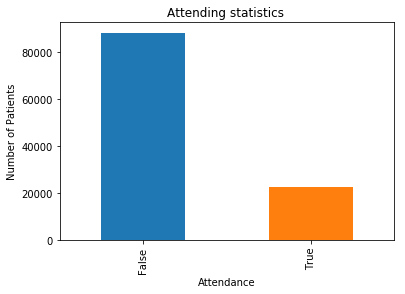

In [64]:
m_e.plot(kind="bar", title="Attending statistics ");
plt.ylabel("Number of Patients");
plt.xlabel("Attendance");

#### <font color=blue|red|green|pink|yellow>Conclusion</font>
### <font color=blue>it is showing that most perople are not attending , which is about 79.8% </font>


---

### <font color=blue|red|green>Question / Are most patients receiving SMS for their appointment or not? </font>

In [65]:
m_a= dr['SMS_received'].value_counts()

m_a

0    75045
1    35482
Name: SMS_received, dtype: int64

In [66]:
X = m_a[0]
Y = m_a[1]
Z = 100/(int(X)+int(Y))
print('Number of people not recieving SMS: '+str(X)+" persons")
print('Number of recieving SMS: '+str(Y)+" persons")
print('Percent of people not recieving SMS: '+str(X*Z)+'%')
print('Percent of people recieving SMS: '+str(Y*Z)+'%')
print('Percent of difference: '+str((X*Z)-(Y*Z))+'%')

Number of people not recieving SMS: 75045 persons
Number of recieving SMS: 35482 persons
Percent of people not recieving SMS: 67.89743682539108%
Percent of people recieving SMS: 32.10256317460892%
Percent of difference: 35.794873650782165%


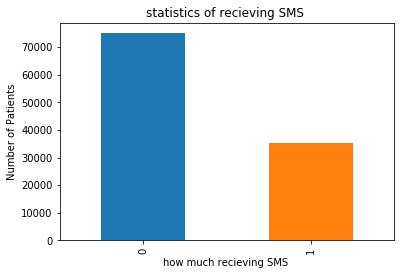

In [67]:
m_a.plot(kind="bar", title="statistics of recieving SMS ");
plt.ylabel("Number of Patients");
plt.xlabel("how much recieving SMS ");

<font color=blue|green>it is showing that most perople are not recieving SMS , which is about 67.8%  and in the same time most perople are not attending , which is about 79.8% from the precious question   </font>


---

---

---

### <font color=blue|pink|yellow>Question / Are there any relation between Number of patients and the appointment time after registered?</font>



In [68]:
dr['Appointment_dif']=dr['Appointment_Day'] - dr['Scheduled_Day']
dr.head(20)

Patient_Id  Appointment_ID Gender Scheduled_Day Appointment_Day  \
0   29872499824296.0         5642903      F    2016-04-29      2016-04-29   
1  558997776694438.0         5642503      M    2016-04-29      2016-04-29   
2    4262962299951.0         5642549      F    2016-04-29      2016-04-29   
3     867951213174.0         5642828      F    2016-04-29      2016-04-29   
4    8841186448183.0         5642494      F    2016-04-29      2016-04-29   
5   95985133231274.0         5626772      F    2016-04-27      2016-04-29   
6  733688164476661.0         5630279      F    2016-04-27      2016-04-29   
7    3449833394123.0         5630575      F    2016-04-27      2016-04-29   
8   56394729949972.0         5638447      F    2016-04-29      2016-04-29   
9   78124564369297.0         5629123      F    2016-04-27      2016-04-29   
10 734536231958495.0         5630213      F    2016-04-27      2016-04-29   
11   7542951368435.0         5620163      M    2016-04-26      2016-04-29   
12 566654781423437.0         5634718      F    2016-04-28      2016-04-29   
13 911394617215919.0         5636249      M    2016-04-28      2016-04-29   
14  99884723334928.0         5633951      F    2016-04-28      2016-04-29   
15     99948393975.0         5620206      F    2016-04-26      2016-04-29   
16  84574392942817.0         5633121      M    2016-04-28      2016-04-29   
17  14794966191172.0         5633460      F    2016-04-28      2016-04-29   
18  17135378245248.0         5621836      F    2016-04-26      2016-04-29   
19   7223289184215.0         5640433      F    2016-04-29      2016-04-29   

    Age      Neighbourhood  Hipertension  Diabetes  Alcoholism  SMS_received  \
0    62    JARDIM DA PENHA             1         0           0             0   
1    56    JARDIM DA PENHA             0         0           0             0   
2    62      MATA DA PRAIA             0         0           0             0   
3     8  PONTAL DE CAMBURI             0         0           0             0   
4    56    JARDIM DA PENHA             1         1           0             0   
5    76          REPÚBLICA             1         0           0             0   
6    23         GOIABEIRAS             0         0           0             0   
7    39         GOIABEIRAS             0         0           0             0   
8    21         ANDORINHAS             0         0           0             0   
9    19          CONQUISTA             0         0           0             0   
10   30     NOVA PALESTINA             0         0           0             0   
11   29     NOVA PALESTINA             0         0           0             1   
12   22     NOVA PALESTINA             0         0           0             0   
13   28     NOVA PALESTINA             0         0           0             0   
14   54     NOVA PALESTINA             0         0           0             0   
15   15     NOVA PALESTINA             0         0           0             1   
16   50     NOVA PALESTINA             0         0           0             0   
17   40          CONQUISTA             0         0           0             0   
18   30     NOVA PALESTINA             0         0           0             1   
19   46           DA PENHA             0         0           0             0   

    Attendance Appointment_dif  
0        False          0 days  
1        False          0 days  
2        False          0 days  
3        False          0 days  
4        False          0 days  
5        False          2 days  
6         True          2 days  
7         True          2 days  
8        False          0 days  
9        False          2 days  
10       False          2 days  
11        True          3 days  
12       False          1 days  
13       False          1 days  
14       False          1 days  
15       False          3 days  
16       False          1 days  
17        True          1 days  
18       False          3 days  
19       False          0 days

In [69]:
m_m= dr['Appointment_dif'].value_counts()
m_m

0 days      38563
2 days       6725
4 days       5290
1 days       5213
7 days       4906
6 days       4037
5 days       3277
14 days      2913
3 days       2737
8 days       2332
21 days      1861
28 days      1706
13 days      1682
9 days       1605
15 days      1503
10 days      1391
20 days      1187
22 days      1173
16 days      1151
12 days      1115
17 days      1107
29 days      1089
19 days      1044
18 days      1021
27 days      1013
11 days       987
35 days       963
23 days       822
34 days       808
26 days       731
            ...  
109 days        5
98 days         5
95 days         5
111 days        5
112 days        5
102 days        4
119 days        4
96 days         4
105 days        4
-1 days         4
92 days         3
122 days        3
94 days         2
110 days        2
107 days        2
97 days         2
93 days         2
115 days        2
117 days        1
127 days        1
151 days        1
125 days        1
126 days        1
101 days        1
82 days   

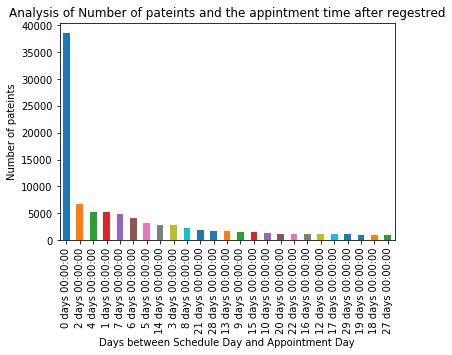

In [70]:
m_m[:25].plot.bar(orientation='vertical')
plt.title('Analysis of Number of pateints and the appintment time after regestred')
plt.xlabel('Days between Schedule Day and Appointment Day')
plt.ylabel('Number of pateints');

---

### <font color=blue|red|green>Question / Is there any correlation between the Neighbourhood and the number of patients</font>


In [71]:
m_c= dr['Neighbourhood'].value_counts()

m_c

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

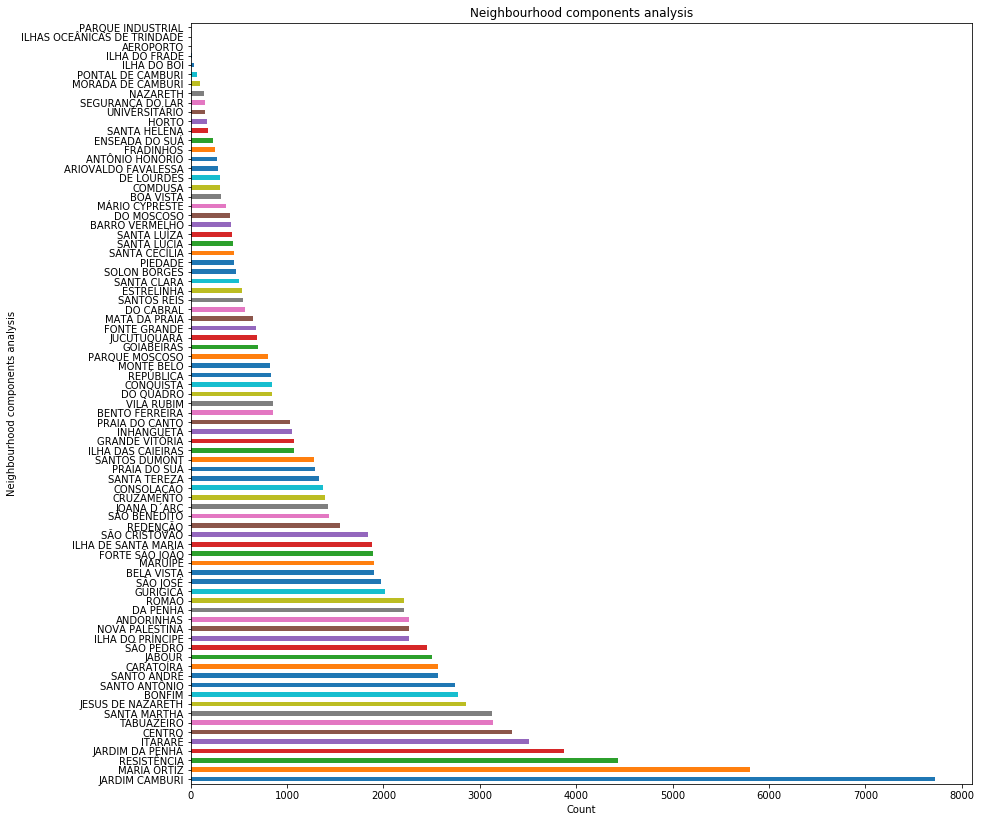

In [72]:
m_c.plot(kind="barh", figsize=(14,14), title="Neighbourhood components analysis");
plt.xlabel("Count");
plt.ylabel("Neighbourhood components analysis");

##### <font color=blue|red|green|pink|yellow>Conclusion</font>
#### <font color=red|green|pink|yellow>As we can see , most patients are from JARDIM CAMBURI or most hospital in this database from JARDIM CAMBURI which is about 7717 patients</font>

---

---

## <font color=blue|red|pink|yellow>Limitations</font>

<font color=red|pink|yellow>I analyzed the dataset but some columns I couldn’t understand it very well because I didn’t collect the data by myself , Also some skills I couldn’t be perfect with because this is the first time I do project in analyzing data. Also Documentation was not clear such as scholarship details so I dropped some columns .</font>



## <font color=blue|green|pink|yellow>Conclusion</font>

<font color=blue|green|pink>After understanding the data and explored it , I answer the question after every part of analysis . Also I can say most people are having an issue with attending  to their appointment which is about 79.8% . Also I conclude that there is no strong relation between the age and the gender  but there is for the Neighborhood. One solution is to provide them with SMS because most people are not receiving SMS which is about 67.8% as the analysis show .Furthermore, It is showing that the Female is more than male for attending health care in general , which is about 30% difference.</font>